# Measurements - miniDSP EARS Calibrations and Compensations

### Imports

In [1]:
from pathfinder import Pathfinder

# abs_paths = [' ']
# relative_paths = Pathfinder.relative_paths_from_abs(abs_paths)

In [2]:
relative_paths = [['..', '..', '..', '..', '..', '..', '資料科學', 'Allen Downey', 'Think DSP', 'code'],
                  ['..', '..', '..', '..', 'AutoEq'],
                  ['..', 'codes']]

Pathfinder.append_relative_paths(relative_paths)

In [3]:
%pylab inline 

import os
from drc.measurements.frequency.responses import Response
from drc.measurements.frequency import plot_spectrum
from drc.measurements.frequency.calibrations.miniDSP import UMIK1, EAR

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
umik = UMIK1()

In [5]:
# fn = 'UMIK-1 cal file 7103946.txt'
fn = 'UMIK-1 cal file 7103946_90deg.txt'

umik.load(file_name = fn, field_sep = None, n_header_lines = 2, line_sep = '\n')

In [6]:
umik.serial_no  

'7103946'

In [7]:
umik.sensitivity_factor_dBFS 

-0.667

In [8]:
umik.sensitivity_dBFS

-48.68759991327963

In [9]:
umik.gain_dB 

18.0

In [10]:
def plot(mic, path, file_name, n_header_lines = 2, field_sep = None):
    fn = os.sep.join((path, file_name))
    mic.load(file_name = fn, field_sep = field_sep, n_header_lines = n_header_lines, line_sep = '\n')
    plot_spectrum(mic.fs, mic.amps)
    return mic.fs, mic.amps

# UMIK1 (calibration)

In [11]:
path = os.path.sep.join(['..', '..', 'plan', 'tech references', 'miniDSP', 'UMIK-1'])

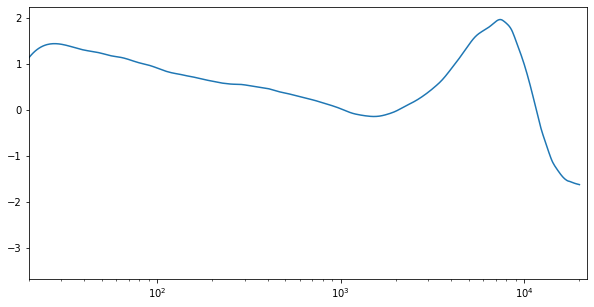

In [12]:
fs_umik1_0_degree, amps_umik1_0_degree = plot(umik, path, 'UMIK-1 cal file 7103946.txt', n_header_lines = 2)

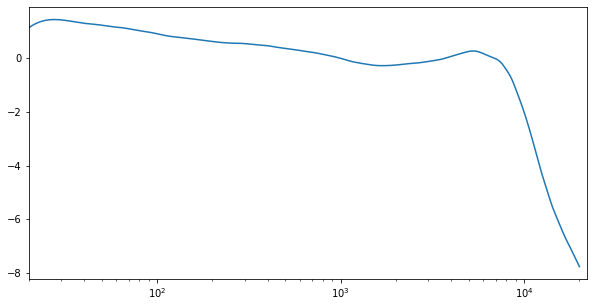

In [13]:
fs_umik1_90_degree, amps_umik1_90_degree = plot(umik, path, 'UMIK-1 cal file 7103946_90deg.txt', n_header_lines = 2)

# EARS
https://www.minidsp.com/images/documents/EARS%20User%20Manual.pdf

In [14]:
path = os.path.sep.join(['..', '..', 'plan', 'tech references', 'miniDSP', 'EARS', 'calibration'])

## RAW (calibration)

In [15]:
ear = EAR()

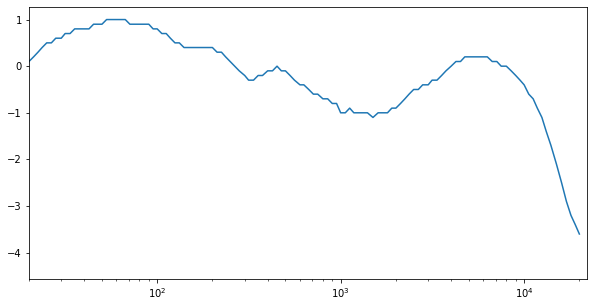

In [16]:
fs_ears_raw_L, amps_ears_raw_L = plot(ear, path, 'L_RAW_8603591.txt', n_header_lines = 12, field_sep = ' ')

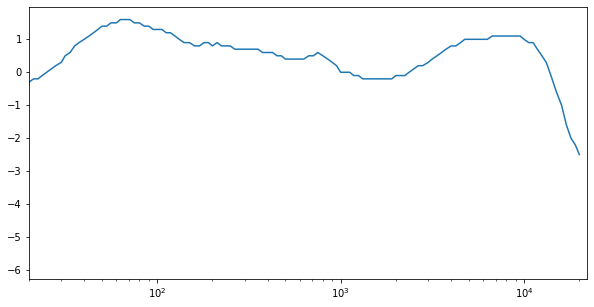

In [17]:
fs_ears_raw_R, amps_ears_raw_R = plot(ear, path, 'R_RAW_8603591.txt', n_header_lines = 12, field_sep = ' ')

## HEQ

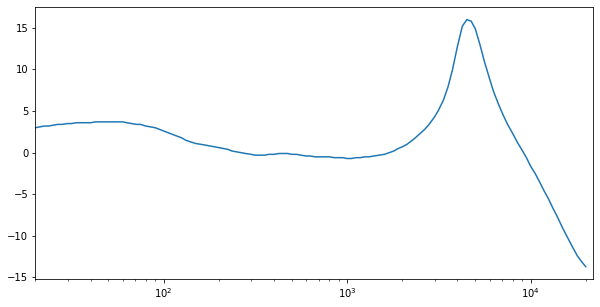

In [18]:
fs_ears_heq_L, amps_ears_heq_L = plot(ear, path, 'L_HEQ_8603591.txt', n_header_lines = 14, field_sep = ' ')

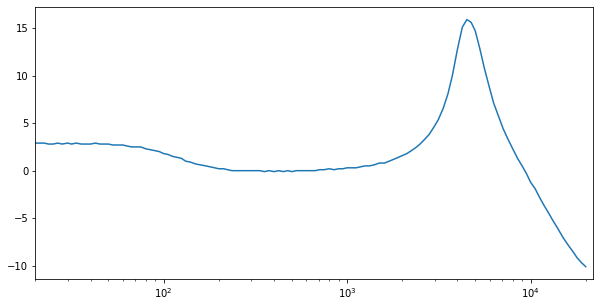

In [19]:
plot_spectrum(fs_ears_heq_L, amps_ears_heq_L - amps_ears_raw_L)

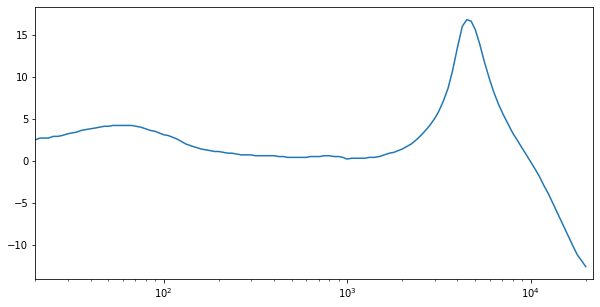

In [20]:
fs_ears_heq_R, amps_ears_heq_R = plot(ear, path, 'R_HEQ_8603591.txt', n_header_lines = 14, field_sep = ' ')

## HPN

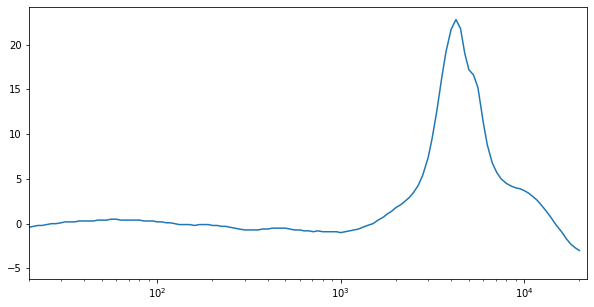

In [21]:
fs_ears_hpn_L, amps_ears_hpn_L = plot(ear, path, 'L_HPN_8603591.txt', n_header_lines = 12, field_sep = ' ')

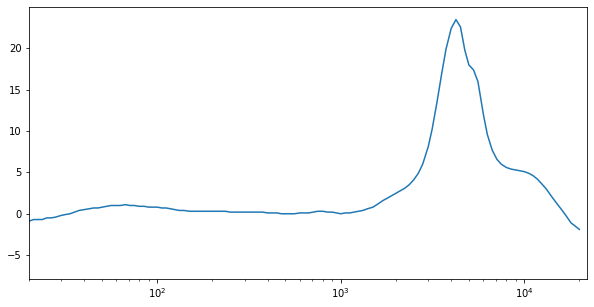

In [22]:
fs_ears_hpn_R, amps_ears_hpn_R = plot(ear, path, 'R_HPN_8603591.txt', n_header_lines = 12, field_sep = ' ')

## IDF

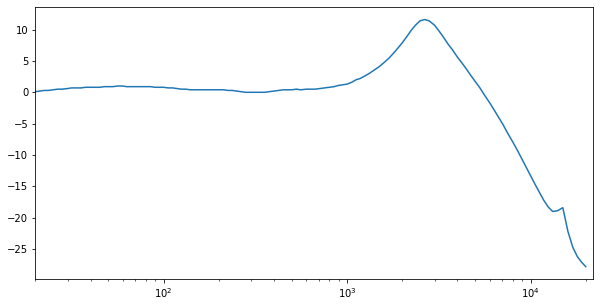

In [23]:
fs_ears_idf_L, amps_ears_idf_L = plot(ear, path, 'L_IDF_8603591.txt', n_header_lines = 12, field_sep = ' ')

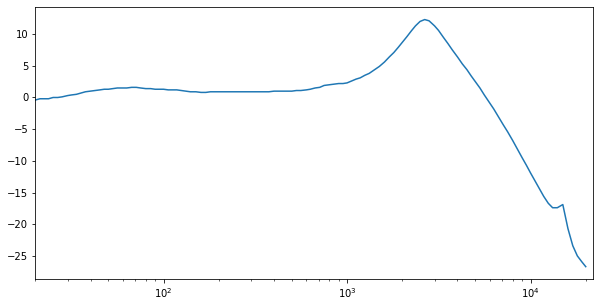

In [24]:
fs_ears_idf_R, amps_ears_idf_R = plot(ear, path, 'R_IDF_8603591.txt', n_header_lines = 12, field_sep = ' ')